<a href="https://colab.research.google.com/github/oguzsenna/urban_sounds_classification/blob/main/urban_sounds_classification_onisleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import data from github repo

In [ ]:
import pandas as pd
import librosa
import librosa.display
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import glob
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import confusion_matrix

In [ ]:
pwd

'/content'

In [ ]:
! git clone https://github.com/Hijikata1835/repo/

Cloning into 'repo'...
remote: Enumerating objects: 8766, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 8766 (delta 2), reused 7 (delta 0), pack-reused 8745
Receiving objects: 100% (8766/8766), 350.94 MiB | 43.49 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (8735/8735), done.


In [ ]:
cd repo/spectrograms

/content/repo/spectrograms


In [ ]:
ls

0/  4/  8/                       urban_sounds_classification.pdf  y_test.csv
1/  5/  9/                       X_test2D.csv                     y_train.csv
2/  6/  UrbanSound8K.csv         X_train2D.csv                    y_val.csv
3/  7/  UrbanSound8K_README.txt  X_val2D.csv


In [ ]:
data = pd.read_csv('/content/repo/spectrograms/UrbanSound8K.csv')
data.drop(columns = ['fsID','start', 'end','salience','fold'], inplace=True)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   slice_file_name  8732 non-null   object
 1   classID          8732 non-null   int64 
 2   class            8732 non-null   object
dtypes: int64(1), object(2)
memory usage: 204.8+ KB


In [ ]:
data.head()

,slice_file_name,classID,class
0,100032-3-0-0.wav,3,dog_bark
1,100263-2-0-117.wav,2,children_playing
2,100263-2-0-121.wav,2,children_playing
3,100263-2-0-126.wav,2,children_playing
4,100263-2-0-137.wav,2,children_playing


In [ ]:
print(data.classID.value_counts())

3    1000
2    1000
0    1000
9    1000
5    1000
7    1000
4    1000
8     929
1     429
6     374
Name: classID, dtype: int64


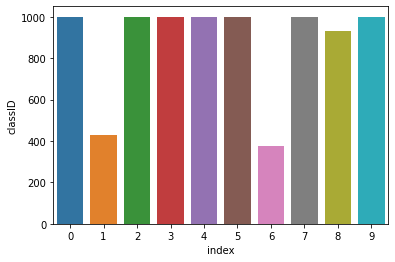

In [ ]:
# küçük bir veri görselleştirme 
import seaborn as sns
classID_count = data["classID"].value_counts().reset_index()

sns.barplot(x="index",
            y="classID",
            data=classID_count)
plt.show()

In [ ]:
def one_function_to_rule_them_all(n): # fonksiyona directoryleri koyacagiz grayscale, resize,edip bize cikti verecek

  #imageFile = cv2.imread(n)
  gray = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) 

  #resizing 
  #scale_percent = 50 # percent of original size
  #width = int(gray.shape[1] * scale_percent / 100)
  #height = int(gray.shape[0] * scale_percent / 100)
  dim = (40, 40)
    
  resized = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
  
  return resized

In [ ]:
deneme = one_function_to_rule_them_all(cv2.imread('/content/repo/spectrograms/0/100852-0-0-0.png'))

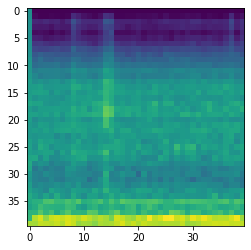

In [ ]:
plt.imshow(deneme)

In [ ]:

cv_img = []
for i in range(10): 
  for img in glob.glob("/content/repo/spectrograms/"+str(i)+"/*.png"):
      n= cv2.imread(img)
      m=one_function_to_rule_them_all(n)
      m= m/255 #normalizing
      cv_img.append([m,i])

In [ ]:
X = []
y = []
for image, category in cv_img:
        X.append(image)
        y.append(category)

In [ ]:
X_train, X_temporary, y_train, y_temporary = train_test_split(X,y,train_size=0.8)

X_val,X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size=0.5)



In [ ]:
print(f'Length of the dataset: {len(X)}')
print(f'Length of the training dataset:  {len(X_train)}')
print(f'Length of the validation dataset: {len(X_val)}')
print(f'Length of the test dataset: {len(X_test)}')


Length of the dataset: 8732
Length of the training dataset:  6985
Length of the validation dataset: 873
Length of the test dataset: 874


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)



In [ ]:
print(X_train.shape)

(6985, 40, 40)


In [ ]:
print(f'Length of the dataset: {len(X)}')
print(f'Length of the training dataset:  {len(X_train)}')
print(f'Length of the validation dataset: {len(X_val)}')
print(f'Length of the test dataset: {len(X_test)}')

Length of the dataset: 8732
Length of the training dataset:  6985
Length of the validation dataset: 873
Length of the test dataset: 874


In [ ]:
#reshaping into 2d to save in csv format
x_train_2d=np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
x_test_2d=np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
x_val_2d=np.reshape(X_val,(X_val.shape[0],X_val.shape[1]*X_val.shape[2]))

In [ ]:
#saving the data numpy arrays
np.savetxt("X_train2D.csv", x_train_2d, delimiter=",")
np.savetxt("X_test2D.csv",x_test_2d,delimiter=",")
np.savetxt("X_val2D.csv",x_val_2d,delimiter=",")

np.savetxt("y_train.csv",y_train,delimiter=",")
np.savetxt("y_test.csv",y_test,delimiter=",")
np.savetxt("y_val.csv",y_val,delimiter=",")

In [ ]:
#downloading the saved data from colab's server
'''from google.colab import files

files.download("X_test2D.csv")
files.download("X_train2D.csv")
files.download("X_val2D.csv")
files.download("y_test.csv")
files.download("y_val.csv")
files.download("y_train.csv")
'''


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf

In [ ]:
# Create a model object
model = tf.keras.Sequential()

In [ ]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'same',
                                 activation = 'relu',
                                 input_shape = (40,40,1)))
                                  

model.add(tf.keras.layers.MaxPool2D(2,2))

# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'same',
                                 activation = 'relu',
                                 ))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'same',
                                 activation = 'relu',
                                 ))

model.add(tf.keras.layers.Flatten())

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )


# Train the model for 50 epochs with batch size of 128
results= model.fit(X_train, y_train,
                   batch_size=128,
                   epochs=50,
                   validation_data= (X_val, y_val)
                   )


Epoch 1/50
55/55 [==============================] - 10s 21ms/step - loss: 2.1456 - accuracy: 0.1916 - val_loss: 1.8984 - val_accuracy: 0.3631
Epoch 2/50
55/55 [==============================] - 1s 14ms/step - loss: 1.8470 - accuracy: 0.3223 - val_loss: 1.5042 - val_accuracy: 0.5040
Epoch 3/50
55/55 [==============================] - 1s 13ms/step - loss: 1.6522 - accuracy: 0.4172 - val_loss: 1.3374 - val_accuracy: 0.5326
Epoch 4/50
55/55 [==============================] - 1s 13ms/step - loss: 1.5131 - accuracy: 0.4693 - val_loss: 1.1232 - val_accuracy: 0.6460
Epoch 5/50
55/55 [==============================] - 1s 13ms/step - loss: 1.3667 - accuracy: 0.5145 - val_loss: 1.0326 - val_accuracy: 0.6816
Epoch 6/50
55/55 [==============================] - 1s 13ms/step - loss: 1.2938 - accuracy: 0.5515 - val_loss: 0.9841 - val_accuracy: 0.6793
Epoch 7/50
55/55 [==============================] - 1s 13ms/step - loss: 1.1833 - accuracy: 0.5887 - val_loss: 0.8530 - val_accuracy: 0.7480
Epoch 8/50
5

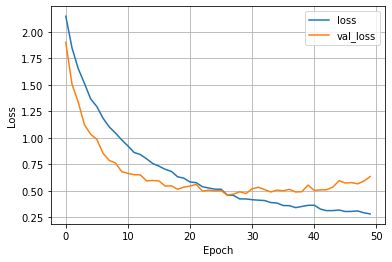

------------------------


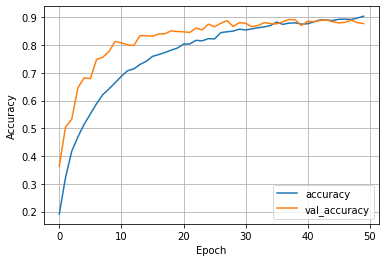

In [ ]:
plt.plot(results.history["loss"], label = "loss")
plt.plot(results.history["val_loss"], label = "val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

print('------------------------')
plt.plot(results.history["accuracy"], label = "accuracy")
plt.plot(results.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

28/28 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8959


[0.41042497754096985, 0.8958809971809387]